## Exploratory Data Analysis of MAMATA stocks <br>
by Andreas Zachariou

### Get Data
First of all, I need to download the data using pandas datareader. The Exploratory Analysis will be focus on the last year on the following companies (MAMATA): <br>
- Microsoft
- Apple
- Meta
- Amazon
- Tesla
- Alphabet (GOOGL)

In [1]:
#import all necessary libraries
#pandas datareader allows you to read stock information directly from the internet
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

#for data processing
import pandas as pd
#for working with arrays
import numpy as np
#for setting start and end datetime object
import datetime
#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
#create a list of tickers
tickers = ['MSFT','AAPL','META','AMZN','TSLA','GOOGL']
#get data for the companies above from yahoo finance from 2021-12-30 to 2022-12-30
start_date = '2021-12-30'
end_date = '2022-12-30'
microsoft = pdr.get_data_yahoo('MSFT', start_date, end_date)
apple = pdr.get_data_yahoo('AAPL', start_date, end_date)
meta = pdr.get_data_yahoo('META', start_date, end_date)
amazon = pdr.get_data_yahoo('AMZN', start_date, end_date)
tesla = pdr.get_data_yahoo('TSLA', start_date, end_date)
google = pdr.get_data_yahoo('GOOGL', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


After downloading the data I will create a table with all the stocks by concatenating all tickers

In [3]:
#concatenate all tables into one dataframe
mamata = pd.concat([microsoft, apple, meta, amazon, tesla, google],
axis=1,keys=tickers,names=['MAMATA_tickers','Stock_Info'])

In [4]:
#check the format of dataframe
mamata.head()

MAMATA_tickers        MSFT                                                  \
Stock_Info            Open        High         Low       Close   Adj Close   
Date                                                                         
2021-12-30      341.910004  343.130005  338.820007  339.320007  336.170074   
2021-12-31      338.510010  339.359985  335.850006  336.320007  333.197906   
2022-01-03      335.350006  338.000000  329.779999  334.750000  331.642456   
2022-01-04      334.829987  335.200012  326.119995  329.010010  325.955750   
2022-01-05      325.859985  326.070007  315.980011  316.380005  313.442993   

MAMATA_tickers                  AAPL                                      ...  \
Stock_Info        Volume        Open        High         Low       Close  ...   
Date                                                                      ...   
2021-12-30      15994500  179.470001  180.570007  178.089996  178.199997  ...   
2021-12-31      18000800  178.089996  179.229996  177.259995  177.570007  ...   
2022-01-03      28865100  177.830002  182.880005  177.710007  182.009995  ...   
2022-01-04      32674300  182.630005  182.940002  179.119995  179.699997  ...   
2022-01-05      40054300  179.610001  180.169998  174.639999  174.919998  ...   

MAMATA_tickers        TSLA                                          GOOGL  \
Stock_Info             Low       Close   Adj Close     Volume        Open   
Date                                                                        
2021-12-30      351.049988  356.779999  356.779999   47040900  146.694000   
2021-12-31      351.529999  352.260010  352.260010   40733700  146.050003   
2022-01-03      378.679993  399.926666  399.926666  103931400  145.054993   
2022-01-04      374.350006  383.196655  383.196655  100248300  145.395996   
2022-01-05      360.336670  362.706665  362.706665   80119800  144.419998   

MAMATA_tickers                                                            
Stock_Info            High         Low       Close   Adj Close    Volume  
Date                                                                      
2021-12-30      147.300003  145.994507  146.200500  146.200500  15688000  
2021-12-31      146.698502  144.852005  144.852005  144.852005  18136000  
2022-01-03      145.850998  143.712997  144.991501  144.991501  28646000  
2022-01-04      146.485001  143.716507  144.399506  144.399506  28400000  
2022-01-05      144.499496  137.688004  137.774994  137.774994  54618000  

[5 rows x 36 columns]

Now that the multi-level data frame is ready, it's time for some exploration.<br> The data frame has two columns - "MAMATA_Tickers" and "Stock_Info" which contains the prices of each stock for each date. 

In [5]:
#max close price of each stock throughout the time period
mamata.xs(key='Close',axis=1,level='Stock_Info').max().round(2)

MAMATA_tickers
MSFT     339.32
AAPL     182.01
META     344.36
AMZN     170.40
TSLA     399.93
GOOGL    148.00
dtype: float64

In [6]:
#min close price of each stock throughout the time period
mamata.xs(key='Close',axis=1,level='Stock_Info').min().round(2)

MAMATA_tickers
MSFT     214.25
AAPL     126.04
META      88.91
AMZN      81.82
TSLA     109.10
GOOGL     83.43
dtype: float64

In [7]:
#mean close price of each stock throughout the time period
mamata.xs(key='Close',axis=1,level='Stock_Info').mean().round(2)

MAMATA_tickers
MSFT     269.58
AAPL     155.12
META     181.70
AMZN     126.60
TSLA     264.37
GOOGL    115.11
dtype: float64

In [8]:
#display the correlation between each stock
stocks_corr = mamata.xs(key="Close",axis=1,level="Stock_Info").corr()
stocks_corr

MAMATA_tickers,MSFT,AAPL,META,AMZN,TSLA,GOOGL
MAMATA_tickers,,,,,,
MSFT,1.000000,0.865009,0.875702,0.890858,0.795469,0.954149
AAPL,0.865009,1.000000,0.693978,0.897865,0.866678,0.828620
META,0.875702,0.693978,1.000000,0.785739,0.752024,0.869197
AMZN,0.890858,0.897865,0.785739,1.000000,0.915108,0.925030
TSLA,0.795469,0.866678,0.752024,0.915108,1.000000,0.825720
GOOGL,0.954149,0.828620,0.869197,0.925030,0.825720,1.000000


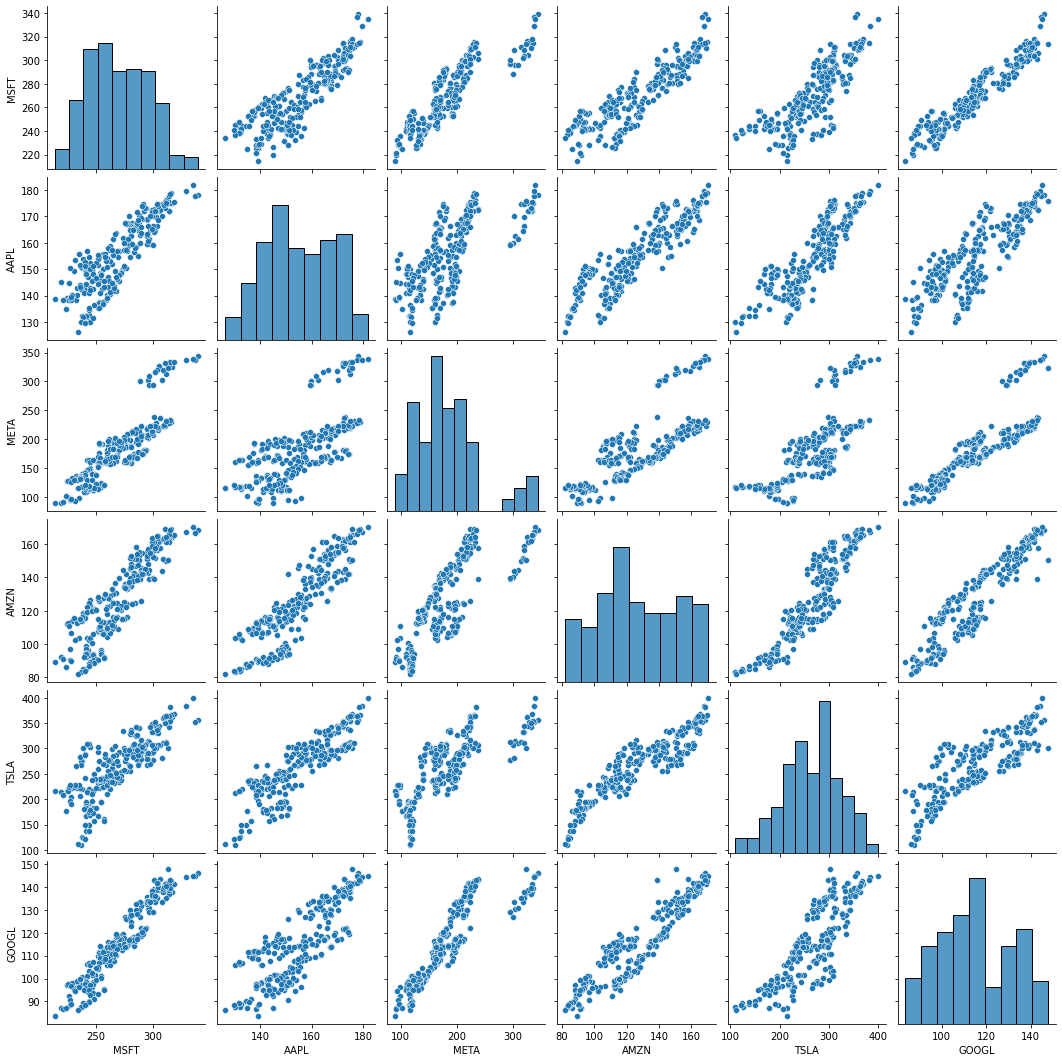

In [9]:
#create a pair plot with the relationships
sns.pairplot(mamata.xs(key="Close",axis=1,level="Stock_Info"))

The pair plot and the correlation matrix support that the most linear relationship can be found between Microsoft and Google since it's close to 1 (0.95). The second most linear relationship is between Google and Amazon. <br>
<br>
Now let's create a heatmap to visualize our correlations.

<AxesSubplot:xlabel='MAMATA_tickers', ylabel='MAMATA_tickers'>

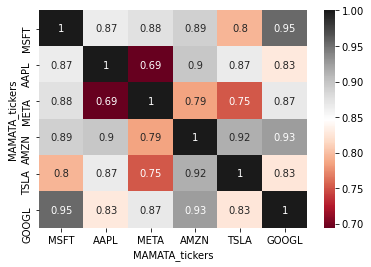

In [10]:
sns.heatmap(mamata.xs(key='Close',axis=1,level='Stock_Info').corr(),annot=True,cmap='RdGy')

In order to check the clusters between each stock, I will visualize this slightly different.

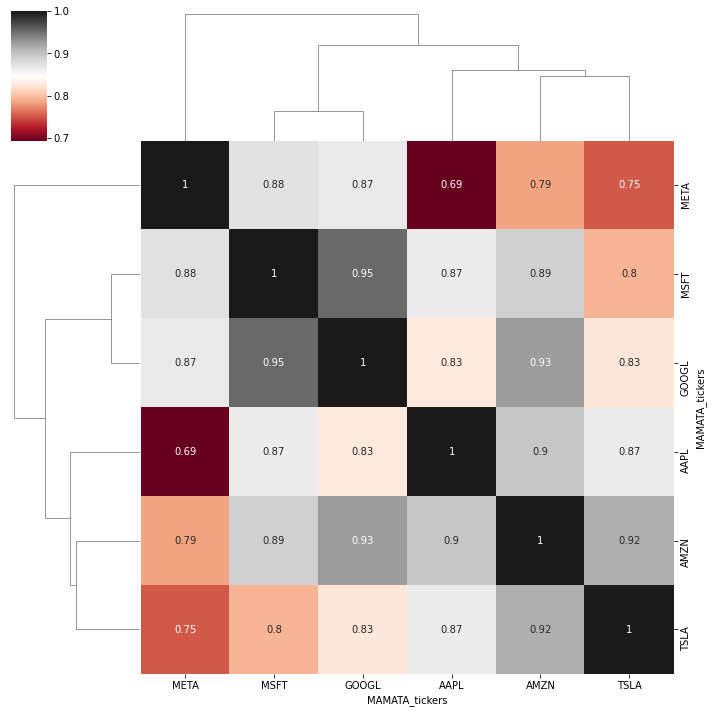

In [11]:
sns.clustermap(mamata.xs(key='Close',axis=1,level='Stock_Info').corr(),annot=True,cmap='RdGy')

As it was expected, the visual above supports that Microsoft and Google are clustered together in a single cluster. Therefore, we can conclude again, that the two stocks are strongly related.<br> Meta seems to be alone in a separate cluster which differentiates its closing price from the rest. <br> <br>
Next, I will check the dates of the min and max returns along with the standard deviation for each stock.

In [12]:
#create an empty dataframe for the stocks' returns
dfreturns = pd.DataFrame()

In [13]:
#find the returns of each stock by using a for loop
for ticker in tickers:
    dfreturns[ticker+" Return"]= mamata[ticker]['Close'].pct_change() 

In [14]:
#check the new dataframe
dfreturns.head()

,MSFT Return,AAPL Return,META Return,AMZN Return,TSLA Return,GOOGL Return
Date,,,,,,
2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,-0.008841,-0.003535,-0.023260,-0.011429,-0.012669,-0.009224
2022-01-03,-0.004668,0.025004,0.006511,0.022118,0.135317,0.000963
2022-01-04,-0.017147,-0.012692,-0.005937,-0.016916,-0.041833,-0.004083
2022-01-05,-0.038388,-0.026600,-0.036728,-0.018893,-0.053471,-0.045876


In [15]:
#date of the maximum returns
dfreturns.idxmax()

MSFT Return    2022-11-10
AAPL Return    2022-11-10
META Return    2022-04-28
AMZN Return    2022-02-04
TSLA Return    2022-01-03
GOOGL Return   2022-07-27
dtype: datetime64[ns]

Microsoft and Apple had their maximum returns on 10$^{th}$ of November where some stability existed in the market.
Meta, Amazon had their maximum returns on the dates following their quarterly reports. Tesla and Google had maximum returns on the dates when the deliverables reached the delivery expectations. More information can be found in [here](https://www.cnbc.com/2022/01/03/tesla-stock-jumps-after-reporting-record-vehicle-deliveries-for-2021.html) and [here](https://www.cnbc.com/2022/07/27/google-stock-is-having-its-second-best-day-of-the-year.html).

In [16]:
#date of the minimum returns
dfreturns.idxmin()

MSFT Return    2022-10-26
AAPL Return    2022-09-13
META Return    2022-02-03
AMZN Return    2022-04-29
TSLA Return    2022-04-26
GOOGL Return   2022-10-26
dtype: datetime64[ns]

Many reasons can contribute to stocks' price. For Microsoft and Google that had same dates of minimum returns, it was the inflation and weak demand of ads sales ([source](https://www.reuters.com/markets/europe/big-tech-tumbles-results-sound-alarm-bells-2022-10-26/)). Inflation also slammed Apple and Amazon stocks as well. More info can be found in [here](https://www.cnbc.com/2022/09/13/what-cramer-is-watching-tuesday-hot-inflation-slams-stocks-recent-apple-rally-fizzles.html) and [here](https://www.cnbc.com/2022/04/29/amazon-shares-sink-11percent-on-disappointing-guidance.html). Meta provided a discouraging forecast which led to a 26% decrease of the share price ([source](https://www.reuters.com/technology/meta-platforms-frankfurt-listed-shares-drop-tepid-forecast-2022-02-03/)). 
Tesla stocks declined on that specific date due to the $44 billion acquisition of Twitter by Elon Musk ([source](https://www.cnbc.com/2022/04/26/tesla-stock-falls-more-than-9percent-after-musks-twitter-deal.html)).

In [17]:
(dfreturns.max().sort_values(ascending=False)*100).round(2)

META Return     17.59
AMZN Return     13.54
TSLA Return     13.53
AAPL Return      8.90
MSFT Return      8.23
GOOGL Return     7.66
dtype: float64

In [18]:
(dfreturns.min().sort_values()*100).round(2)

META Return    -26.39
AMZN Return    -14.05
TSLA Return    -12.18
GOOGL Return    -9.14
MSFT Return     -7.72
AAPL Return     -5.87
dtype: float64

In [19]:
#standard deviation (%)
(dfreturns.std().sort_values(ascending=False)*100).round(2)

TSLA Return     4.20
META Return     4.05
AMZN Return     3.16
GOOGL Return    2.44
AAPL Return     2.25
MSFT Return     2.23
dtype: float64

Based on the output above, Meta lost ~26% in a day. It also shows one of the highest standard deviations which indicates some volatility during the last year.

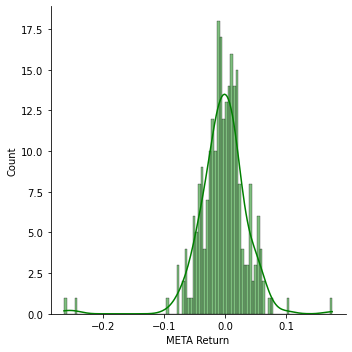

In [20]:
#create a distribution plot for Meta Returns
sns.displot(data=dfreturns['META Return'],bins=100,kde=True,color='green')

As we can decipher from the above distribution plot, there are two high peaks on the negative side of the graph. Thus, most of the returns that were recorded in the previous year negatively affected Meta. The next highest peaks were on the positive side of the graph. Outliers were encountered in both sides of the plot, however, the highest deviation stretches even further from -0.2.

<AxesSubplot:xlabel='Date'>

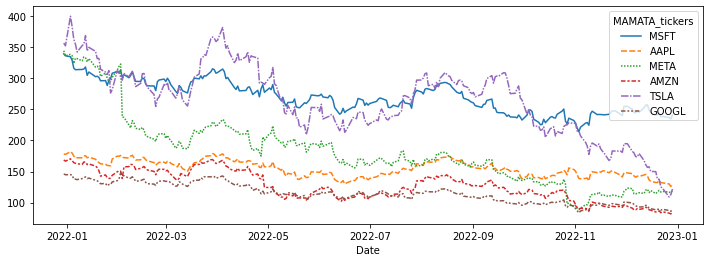

In [21]:
#create a line chart of MAMATA stocks
plt.figure(figsize=(12,4))
sns.lineplot(data = mamata.xs(key='Close',axis=1,level='Stock_Info'))

The line graph above suggests that the closing prices of all stocks declined during the last year. MSFT, META and TSLA started with relatively similar prices. TSLA recorded high fluctuations and ended the year with a closing price of around 122 and META 120.<br>
<br>
Below I will check the one-year performance of each stock.

In [22]:
last_day_price = mamata.xs(key='Close',axis=1,level='Stock_Info').iloc[-1]
first_day_price = mamata.xs(key='Close',axis=1,level='Stock_Info').iloc[0]
one_year_return = ((last_day_price/first_day_price)-1)*100
one_year_return.sort_values(ascending=False).round(2)

MAMATA_tickers
AAPL    -27.27
MSFT    -28.97
GOOGL   -39.50
AMZN    -50.08
META    -65.08
TSLA    -65.86
dtype: float64

<AxesSubplot:title={'center':'One-Year Return'}, ylabel='MAMATA_tickers'>

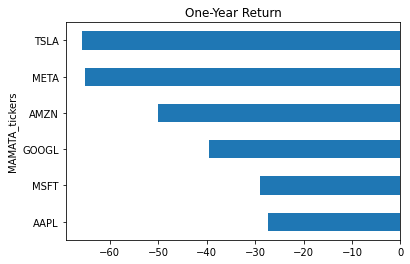

In [23]:
#plot a horizontal bar chart for the stocks' performance
one_year_return.sort_values(ascending=False).plot(kind="barh",title="One-Year Return")

During the last year, Tesla and Meta lost more than 65% of their value and Amazon more than 50%. Apple was the only company with the fewest losses. <br> As commented earlier, all stock prices declined during the last year. <br> <br>
Next, I will generate a 30-Day Moving Average (MA) plot for Tesla and a few interactive plots.

In [24]:
#find the 30-Day Moving Average for TSLA
mamata['TSLA30']= mamata.xs(key='Close',axis=1,level='Stock_Info')['TSLA'].rolling(window=30).mean()

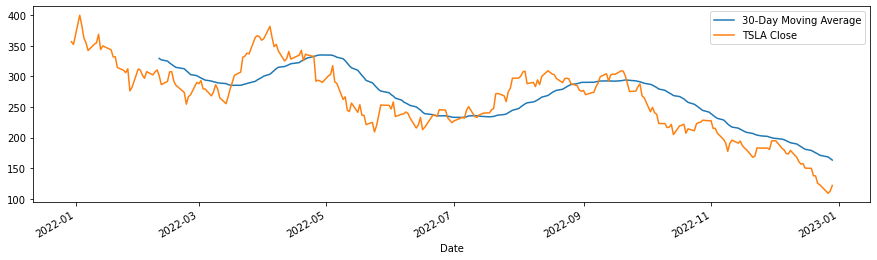

In [25]:
#plot close price along with 30-Day MA of TSLA
plt.figure(figsize=(15,4))
mamata['TSLA30'].plot(label='30-Day Moving Average')
mamata.xs(key='Close',axis=1,level='Stock_Info')['TSLA'].plot(label='TSLA Close')
plt.legend()

In [26]:
#plot interactive line graph
mamata.xs(key='Close',axis=1,level='Stock_Info').iplot()

In [27]:
mamata['TSLA'].iplot(kind='candle',title='Candlestick chart - TESLA')

Key takeaways:

- Microsoft and Google had shown the strongest positive correlation
- Tesla and Meta are the most volatile MAMATA stocks
- All stocks have shown a strong negative trend during the last year
- Apple was the only stock with the fewest losses for the year
- Tesla was the worst-performing stock, followed by Meta